In [1]:
# Imports
import pandas as pd
import matplotlib as plt
from datetime import datetime as dt
import numpy as np
import seaborn as sns

In [2]:
poll_report=pd.read_csv("Poll_Report.csv", sep=';')
poll_report

,Question ID,User Name,User Email,Submitted Date/Time,Student Answer
0,11,Student1,table@abc.se,"Feb 17, 2020 10:46:33",B
1,11,Student2,chair@abc.se,"Feb 17, 2020 10:46:19",E
2,11,Student3,spoon@abc.se,"Feb 17, 2020 10:44:49",A
3,11,Student4,plate@abc.se,"Feb 17, 2020 10:45:30",A
4,11,Student5,fork@abc.se,"Feb 17, 2020 10:44:53",E
...,...,...,...,...,...
479,2,Student23,dishes@abc.se,"Feb 17, 2020 10:16:34",B
480,2,Student24,dish_washer@abc.se,"Feb 17, 2020 10:16:57",B
481,2,Student25,handsoap@abc.se,"Feb 17, 2020 10:16:56",D
482,2,Student26,sink@abc.se,"Feb 17, 2020 10:17:10",B


In [3]:
poll_info=pd.read_csv("Poll_Info.csv", sep='\t')
poll_info

,Question,Correct Answer,Time Launched
0,1,C,"Feb 17, 2020 10:14:55"
1,2,B,"Feb 17, 2020 10:16:14"
2,3,E,"Feb 17, 2020 10:19:30"
3,4,C,"Feb 17, 2020 10:22:15"
4,5,B,"Feb 17, 2020 10:24:44"
5,6,E,"Feb 17, 2020 10:29:17"
6,7,C,"Feb 17, 2020 10:30:35"
7,8,D,"Feb 17, 2020 10:33:30"
8,9,A,"Feb 17, 2020 10:37:09"
9,10,D,"Feb 17, 2020 10:40:15"


In [4]:
poll_report.rename(columns={"Question ID": "Question"}, inplace=True)

In [5]:
df = pd.merge(
    poll_report,
    poll_info,
    on = ['Question'],
)

In [6]:
df["Correctly Answered"] = np.where(df["Student Answer"] == df["Correct Answer"], True, False)
df["Incorrectly Answered"] = np.where(df["Student Answer"] != df["Correct Answer"], True, False)

In [7]:
#datetime.strptime(start,"%H:%M:%S").time()

In [8]:
df['Submitted Date/Time']=pd.to_datetime(df['Submitted Date/Time'])#.time()
df['Time Launched']=pd.to_datetime(df['Time Launched'])#.time()
#df['Submitted Date/Time'] = pd.to_datetime(df['Submitted Date/Time']).dt.time
#df['Time Launched'] = pd.to_datetime(df['Time Launched']).dt.time
df

,Question,User Name,User Email,Submitted Date/Time,Student Answer,Correct Answer,Time Launched,Correctly Answered,Incorrectly Answered
0,11,Student1,table@abc.se,2020-02-17 10:46:33,B,A,2020-02-17 10:44:00,False,True
1,11,Student2,chair@abc.se,2020-02-17 10:46:19,E,A,2020-02-17 10:44:00,False,True
2,11,Student3,spoon@abc.se,2020-02-17 10:44:49,A,A,2020-02-17 10:44:00,True,False
3,11,Student4,plate@abc.se,2020-02-17 10:45:30,A,A,2020-02-17 10:44:00,True,False
4,11,Student5,fork@abc.se,2020-02-17 10:44:53,E,A,2020-02-17 10:44:00,False,True
...,...,...,...,...,...,...,...,...,...
479,2,Student23,dishes@abc.se,2020-02-17 10:16:34,B,B,2020-02-17 10:16:14,True,False
480,2,Student24,dish_washer@abc.se,2020-02-17 10:16:57,B,B,2020-02-17 10:16:14,True,False
481,2,Student25,handsoap@abc.se,2020-02-17 10:16:56,D,B,2020-02-17 10:16:14,False,True
482,2,Student26,sink@abc.se,2020-02-17 10:17:10,B,B,2020-02-17 10:16:14,True,False


In [9]:
df.dtypes

Question                         int64
User Name                       object
User Email                      object
Submitted Date/Time     datetime64[ns]
Student Answer                  object
Correct Answer                  object
Time Launched           datetime64[ns]
Correctly Answered                bool
Incorrectly Answered              bool
dtype: object

In [10]:
df['Time_on_Q'] = df['Submitted Date/Time']-df['Time Launched']
df

,Question,User Name,User Email,Submitted Date/Time,Student Answer,Correct Answer,Time Launched,Correctly Answered,Incorrectly Answered,Time_on_Q
0,11,Student1,table@abc.se,2020-02-17 10:46:33,B,A,2020-02-17 10:44:00,False,True,0 days 00:02:33
1,11,Student2,chair@abc.se,2020-02-17 10:46:19,E,A,2020-02-17 10:44:00,False,True,0 days 00:02:19
2,11,Student3,spoon@abc.se,2020-02-17 10:44:49,A,A,2020-02-17 10:44:00,True,False,0 days 00:00:49
3,11,Student4,plate@abc.se,2020-02-17 10:45:30,A,A,2020-02-17 10:44:00,True,False,0 days 00:01:30
4,11,Student5,fork@abc.se,2020-02-17 10:44:53,E,A,2020-02-17 10:44:00,False,True,0 days 00:00:53
...,...,...,...,...,...,...,...,...,...,...
479,2,Student23,dishes@abc.se,2020-02-17 10:16:34,B,B,2020-02-17 10:16:14,True,False,0 days 00:00:20
480,2,Student24,dish_washer@abc.se,2020-02-17 10:16:57,B,B,2020-02-17 10:16:14,True,False,0 days 00:00:43
481,2,Student25,handsoap@abc.se,2020-02-17 10:16:56,D,B,2020-02-17 10:16:14,False,True,0 days 00:00:42
482,2,Student26,sink@abc.se,2020-02-17 10:17:10,B,B,2020-02-17 10:16:14,True,False,0 days 00:00:56


In [11]:
df.dtypes

Question                          int64
User Name                        object
User Email                       object
Submitted Date/Time      datetime64[ns]
Student Answer                   object
Correct Answer                   object
Time Launched            datetime64[ns]
Correctly Answered                 bool
Incorrectly Answered               bool
Time_on_Q               timedelta64[ns]
dtype: object

In [12]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [13]:
df_pivot=df.pivot(index='User Name', columns='Question', values=['Student Answer','Correct Answer'])
df_pivot

Student Answer                             ... Correct Answer        \
Question              1  2  3  4  5  6  7  8  9  10  ...             9  10 11   
User Name                                            ...                        
Student1               C  D  A  C  B  E  C  C  A  A  ...              A  D  A   
Student10              C  A  E  C  A  E  C  C  A  B  ...              A  D  A   
Student11              C  B  C  C  A  E  C  C  D  A  ...              A  D  A   
Student12              C  C  D  C  B  E  C  C  A  D  ...              A  D  A   
Student13              C  B  E  C  B  E  C  D  A  D  ...              A  D  A   
Student14              C  B  D  C  B  E  B  C  A  D  ...              A  D  A   
Student15              C  D  D  C  B  B  A  D  A  D  ...              A  D  A   
Student16              C  B  E  C  B  E  C  D  A  D  ...              A  D  A   
Student17              C  B  E  C  B  E  C  B  A  A  ...              A  D  A   
Student18              C  B  E  C  A  E  C  C  A  B  ...              A  D  A   
Student19              C  A  E  C  B  E  C  B  D  A  ...              A  D  A   
Student2               C  B  C  C  B  E  C  B  D  A  ...              A  D  A   
Student20              C  B  E  C  A  D  C  D  A  D  ...              A  D  A   
Student21              C  B  E  C  B  D  B  C  A  D  ...              A  D  A   
Student22              C  A  D  B  B  E  C  A  D  D  ...              A  D  A   
Student23              C  B  D  B  B  D  C  E  A  A  ...              A  D  A   
Student24              C  B  E  C  B  D  B  C  A  C  ...              A  D  A   
Student25              C  D  D  C  B  E  A  D  A  D  ...              A  D  A   
Student26              C  B  E  C  B  E  C  D  A  D  ...              A  D  A   
Student27              B  D  D  C  A  C  D  D  A  B  ...              A  D  A   
Student3               C  B  D  B  B  E  C  C  C  D  ...              A  D  A   
Student4               C  A  D  B  B  E  B  D  D  D  ...              A  D  A   
Student5               C  D  C  C  A  E  D  C  A  D  ...              A  D  A   
Student6               B  B  A  C  B  D  B  D  A  D  ...              A  D  A   
Student7               C  B  D  C  B  D  C  D  A  D  ...              A  D  A   
Student8               C  C  C  C  B  E  C  D  C  A  ...              A  D  A   
Student9               C  B  D  C  B  E  C  D  A  D  ...              A  D  A   

                                    
Question    12 13 14 15 16 17   18  
User Name                           
Student1     D  B  B  B  D  B    A  
Student10    D  B  B  B  D  B    A  
Student11    D  B  B  B  D  B    A  
Student12    D  B  B  B  D  B    A  
Student13    D  B  B  B  D  B    A  
Student14    D  B  B  B  D  B    A  
Student15    D  B  B  B  D  B    A  
Student16    D  B  B  B  D  B    A  
Student17    D  B  B  B  D  B    A  
Student18    D  B  B  B  D  B    A  
Student19    D  B  B  B  D  B    A  
Student2     D  B  B  B  D  B    A  
Student20    D  B  B  B  D  B    A  
Student21    D  B  B  B  D  B    A  
Student22    D  B  B  B  D  B    A  
Student23  NaN  B  B  B  D  B  NaN  
Student24    D  B  B  B  D  B    A  
Student25    D  B  B  B  D  B    A  
Student26    D  B  B  B  D  B    A  
Student27    D  B  B  B  D  B    A  
Student3     D  B  B  B  D  B    A  
Student4     D  B  B  B  D  B    A  
Student5     D  B  B  B  D  B    A  
Student6     D  B  B  B  D  B    A  
Student7     D  B  B  B  D  B    A  
Student8     D  B  B  B  D  B    A  
Student9     D  B  B  B  D  B    A  

[27 rows x 36 columns]

In [14]:
df_1=df.groupby(['User Name'])['Correctly Answered'].sum()
df_1

User Name
Student1      9
Student10    12
Student11    10
Student12    14
Student13    17
Student14    14
Student15    11
Student16    18
Student17    14
Student18    12
Student19    10
Student2     11
Student20    16
Student21    15
Student22    11
Student23     6
Student24    13
Student25    12
Student26    15
Student27     7
Student3     13
Student4     13
Student5      8
Student6     11
Student7     15
Student8     10
Student9     15
Name: Correctly Answered, dtype: int64

<AxesSubplot:xlabel='User Name'>

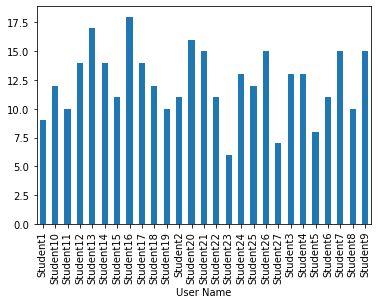

In [15]:
df_1.plot.bar()

In [16]:
for student, row in df_pivot.iterrows():
    print(student)
    tick=0
    correct=0
    for row2 in row['Student Answer']:
        tick+=1
        if row['Student Answer'][tick] == row['Correct Answer'][tick]:
            if row['Student Answer'][tick]=='NaN':
                pass
            else: correct+=1
    print(correct)

Student1
9
Student10
12
Student11
10
Student12
14
Student13
17
Student14
14
Student15
11
Student16
18
Student17
14
Student18
12
Student19
10
Student2
11
Student20
16
Student21
15
Student22
11
Student23
6
Student24
13
Student25
12
Student26
15
Student27
7
Student3
13
Student4
13
Student5
8
Student6
11
Student7
15
Student8
10
Student9
15


In [17]:
df_pivot2=df.pivot(index='Question', columns='User Name', values=['Student Answer','Correct Answer'])
df_pivot2

Student Answer                                                    \
User Name       Student1 Student10 Student11 Student12 Student13 Student14   
Question                                                                     
1                      C         C         C         C         C         C   
2                      D         A         B         C         B         B   
3                      A         E         C         D         E         D   
4                      C         C         C         C         C         C   
5                      B         A         A         B         B         B   
6                      E         E         E         E         E         E   
7                      C         C         C         C         C         B   
8                      C         C         C         C         D         C   
9                      A         A         D         A         A         A   
10                     A         B         A         D         D         D   
11                     B         A         B         A         A         A   
12                     C         D         D         D         D         D   
13                     B         B         B         B         B         B   
14                     A         A         A         B         B         A   
15                     B         C         C         B         D         B   
16                     A         D         D         D         D         D   
17                     B         B         B         C         B         B   
18                     B         A         A         A         A         A   

                                                   ... Correct Answer  \
User Name Student15 Student16 Student17 Student18  ...      Student25   
Question                                           ...                  
1                 C         C         C         C  ...              C   
2                 D         B         B         B  ...              B   
3                 D         E         E         E  ...              E   
4                 C         C         C         C  ...              C   
5                 B         B         B         A  ...              B   
6                 B         E         E         E  ...              E   
7                 A         C         C         C  ...              C   
8                 D         D         B         C  ...              D   
9                 A         A         A         A  ...              A   
10                D         D         A         B  ...              D   
11                B         A         A         B  ...              A   
12                D         D         A         D  ...              D   
13                B         B         B         B  ...              B   
14                A         B         B         A  ...              B   
15                B         B         B         C  ...              B   
16                D         D         B         D  ...              D   
17                B         B         B         B  ...              B   
18                C         A         A         A  ...              A   

                                                                            \
User Name Student26 Student27 Student3 Student4 Student5 Student6 Student7   
Question                                                                     
1                 C         C        C        C        C        C        C   
2                 B         B        B        B        B        B        B   
3                 E         E        E        E        E        E        E   
4                 C         C        C        C        C        C        C   
5                 B         B        B        B        B        B        B   
6                 E         E        E        E        E        E        E   
7                 C         C        C        C        C        C        C   
8                 D         D        D        D        D 

In [18]:
df_2=df.groupby(['Question'])['Correctly Answered'].sum()

<AxesSubplot:xlabel='Question'>

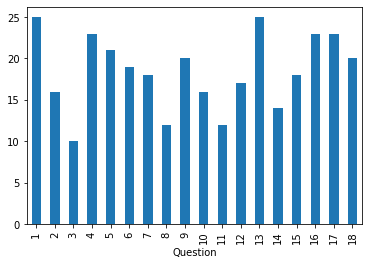

In [19]:
df_2.plot.bar()

In [20]:
for question, row in df_pivot2.iterrows():
    print('Question: ',question)
    tick=0
    correct=0
    
    for row2 in row['Student Answer']:
        #print(row2)
        if row['Student Answer'][tick] == row['Correct Answer'][tick]:
            #print('true')
            if row['Student Answer'][tick]=='NaN':
                pass
            else: correct+=1
        tick+=1
    print(correct)

Question:  1
25
Question:  2
16
Question:  3
10
Question:  4
23
Question:  5
21
Question:  6
19
Question:  7
18
Question:  8
12
Question:  9
20
Question:  10
16
Question:  11
12
Question:  12
17
Question:  13
25
Question:  14
14
Question:  15
18
Question:  16
23
Question:  17
23
Question:  18
20


In [21]:
##.strftime("%X") ## 4 only time part 

In [22]:
df_pivot3=df.pivot(index='User Name', columns='Question', values=['Time_on_Q'])
df_pivot3

Time_on_Q                                                  \
Question               1               2               3               4    
User Name                                                                   
Student1  0 days 00:00:32 0 days 00:01:28 0 days 00:01:57 0 days 00:00:26   
Student10 0 days 00:00:28 0 days 00:00:35 0 days 00:00:23 0 days 00:00:29   
Student11 0 days 00:00:31 0 days 00:01:04 0 days 00:01:57 0 days 00:01:09   
Student12 0 days 00:00:46 0 days 00:01:14 0 days 00:01:15 0 days 00:00:39   
Student13 0 days 00:00:29 0 days 00:00:50 0 days 00:00:08 0 days 00:00:39   
Student14 0 days 00:00:26 0 days 00:00:21 0 days 00:00:50 0 days 00:00:58   
Student15 0 days 00:00:37 0 days 00:01:31 0 days 00:01:04 0 days 00:00:58   
Student16 0 days 00:00:33 0 days 00:00:31 0 days 00:00:17 0 days 00:00:21   
Student17 0 days 00:00:25 0 days 00:00:51 0 days 00:01:01 0 days 00:01:28   
Student18 0 days 00:00:30 0 days 00:00:36 0 days 00:00:24 0 days 00:00:28   
Student19 0 days 00:00:28 0 days 00:00:51 0 days 00:01:23 0 days 00:00:54   
Student2  0 days 00:00:26 0 days 00:01:04 0 days 00:01:56 0 days 00:01:07   
Student20 0 days 00:00:27 0 days 00:00:54 0 days 00:01:24 0 days 00:00:57   
Student21 0 days 00:00:28 0 days 00:00:44 0 days 00:00:50 0 days 00:00:58   
Student22 0 days 00:00:26 0 days 00:01:20 0 days 00:01:36 0 days 00:01:24   
Student23 0 days 00:00:26 0 days 00:00:20 0 days 00:01:55 0 days 00:01:36   
Student24 0 days 00:00:27 0 days 00:00:43 0 days 00:00:33 0 days 00:00:56   
Student25 0 days 00:00:26 0 days 00:00:42 0 days 00:00:47 0 days 00:00:59   
Student26 0 days 00:00:26 0 days 00:00:56 0 days 00:00:59 0 days 00:00:43   
Student27 0 days 00:00:38 0 days 00:00:57 0 days 00:00:29 0 days 00:00:57   
Student3  0 days 00:00:31 0 days 00:01:01 0 days 00:00:37 0 days 00:01:36   
Student4  0 days 00:00:29 0 days 00:00:27 0 days 00:00:24 0 days 00:00:59   
Student5  0 days 00:00:30 0 days 00:00:53 0 days 00:00:55 0 days 00:01:01   
Student6  0 days 00:00:33 0 days 00:00:36 0 days 00:01:20 0 days 00:00:49   
Student7  0 days 00:00:26 0 days 00:00:38 0 days 00:00:16 0 days 00:00:34   
Student8  0 days 00:00:24 0 days 00:00:32 0 days 00:00:35 0 days 00:00:57   
Student9  0 days 00:00:29 0 days 00:00:33 0 days 00:00:55 0 days 00:00:32   

                                                                           \
Question               5               6               7               8    
User Name                                                                   
Student1  0 days 00:01:32 0 days 00:00:29 0 days 00:00:34 0 days 00:01:00   
Student10 0 days 00:00:46 0 days 00:00:36 0 days 00:01:25 0 days 00:01:08   
Student11 0 days 00:01:37 0 days 00:00:33 0 days 00:00:54 0 days 00:02:03   
Student12 0 days 00:00:39 0 days 00:00:32 0 days 00:00:39 0 days 00:00:45   
Student13 0 days 00:00:33 0 days 00:00:32 0 days 00:01:40 0 days 00:01:28   
Student14 0 days 00:00:27 0 days 00:00:29 0 days 00:00:39 0 days 00:00:39   
Student15 0 days 00:01:29 0 days 00:01:06 0 days 00:01:32 0 days 00:01:42   
Student16 0 days 00:00:30 0 days 00:00:31 0 days 00:00:55 0 days 00:00:59   
Student17 0 days 00:00:42 0 days 00:00:41 0 days 00:01:07 0 days 00:01:58   
Student18 0 days 00:00:49 0 days 00:00:42 0 days 00:01:17 0 days 00:01:14   
Student19 0 days 00:01:10 0 days 00:00:29 0 days 00:00:58 0 days 00:01:50   
Student2  0 days 00:01:30 0 days 00:00:33 0 days 00:00:55 0 days 00:02:10   
Student20 0 days 00:00:48 0 days 00:00:29 0 days 00:01:18 0 days 00:01:01   
Student21 0 days 00:00:57 0 days 00:00:48 0 days 00:01:07 0 days 00:01:23   
Student22 0 days 00:00:39 0 days 00:00:36 0 days 00:00:54 0 days 00:01:57   
Student23 0 days 00:00:31 0 days 00:00:36 0 days 00:00:34 0 days 00:02:09   
Student24 0 days 00:00:28 0 days 00:01:02 0 days 00:01:10 0 days 00:01:45   
Student25 0 days 00:00:58 0 days 00:01:05 0 days 00:01:30 0 days 00:01:42   
Student26 0 days 00:00:33 0 days 00:00:32 0 days 00:00:48 0 days 00:01:12   
Student27 0

In [23]:
for student, row in df_pivot3.iterrows():
    print(student)
    print(row.max())

Student1
0 days 00:04:41
Student10
0 days 00:02:16
Student11
0 days 00:05:36
Student12
0 days 00:02:31
Student13
0 days 00:03:35
Student14
0 days 00:01:03
Student15
0 days 00:06:19
Student16
0 days 00:01:12
Student17
0 days 00:03:52
Student18
0 days 00:02:16
Student19
0 days 00:02:44
Student2
0 days 00:05:35
Student20
0 days 00:02:15
Student21
0 days 00:04:06
Student22
0 days 00:02:15
Student23
0 days 00:02:35
Student24
0 days 00:02:50
Student25
0 days 00:06:05
Student26
0 days 00:01:36
Student27
0 days 00:06:50
Student3
0 days 00:02:50
Student4
0 days 00:02:59
Student5
0 days 00:01:38
Student6
0 days 00:03:28
Student7
0 days 00:02:02
Student8
0 days 00:02:29
Student9
0 days 00:02:28


In [24]:
df['Time_on_Q'].max()

Timedelta('0 days 00:06:50')

In [25]:
df.loc[df['Time_on_Q'] == '0 days 00:06:50']

,Question,User Name,User Email,Submitted Date/Time,Student Answer,Correct Answer,Time Launched,Correctly Answered,Incorrectly Answered,Time_on_Q
375,18,Student27,tap@abc.se,2020-02-17 11:24:44,B,A,2020-02-17 11:17:54,False,True,0 days 00:06:50


In [26]:
df_pivot3=df.pivot(index='Question', columns='User Name', values=['Time_on_Q'])
df_pivot3

Time_on_Q                                                  \
User Name        Student1       Student10       Student11       Student12   
Question                                                                    
1         0 days 00:00:32 0 days 00:00:28 0 days 00:00:31 0 days 00:00:46   
2         0 days 00:01:28 0 days 00:00:35 0 days 00:01:04 0 days 00:01:14   
3         0 days 00:01:57 0 days 00:00:23 0 days 00:01:57 0 days 00:01:15   
4         0 days 00:00:26 0 days 00:00:29 0 days 00:01:09 0 days 00:00:39   
5         0 days 00:01:32 0 days 00:00:46 0 days 00:01:37 0 days 00:00:39   
6         0 days 00:00:29 0 days 00:00:36 0 days 00:00:33 0 days 00:00:32   
7         0 days 00:00:34 0 days 00:01:25 0 days 00:00:54 0 days 00:00:39   
8         0 days 00:01:00 0 days 00:01:08 0 days 00:02:03 0 days 00:00:45   
9         0 days 00:01:49 0 days 00:01:59 0 days 00:01:30 0 days 00:00:53   
10        0 days 00:01:50 0 days 00:01:39 0 days 00:02:51 0 days 00:00:43   
11        0 days 00:02:33 0 days 00:02:16 0 days 00:02:33 0 days 00:00:57   
12        0 days 00:01:15 0 days 00:01:47 0 days 00:02:18 0 days 00:01:26   
13        0 days 00:02:00 0 days 00:01:00 0 days 00:00:31 0 days 00:02:04   
14        0 days 00:01:04 0 days 00:01:08 0 days 00:01:01 0 days 00:00:53   
15        0 days 00:01:57 0 days 00:01:17 0 days 00:02:41 0 days 00:02:31   
16        0 days 00:01:29 0 days 00:00:26 0 days 00:01:08 0 days 00:01:30   
17        0 days 00:01:07 0 days 00:01:19 0 days 00:00:45 0 days 00:02:26   
18        0 days 00:04:41 0 days 00:00:41 0 days 00:05:36 0 days 00:00:32   

                                                                           \
User Name       Student13       Student14       Student15       Student16   
Question                                                                    
1         0 days 00:00:29 0 days 00:00:26 0 days 00:00:37 0 days 00:00:33   
2         0 days 00:00:50 0 days 00:00:21 0 days 00:01:31 0 days 00:00:31   
3         0 days 00:00:08 0 days 00:00:50 0 days 00:01:04 0 days 00:00:17   
4         0 days 00:00:39 0 days 00:00:58 0 days 00:00:58 0 days 00:00:21   
5         0 days 00:00:33 0 days 00:00:27 0 days 00:01:29 0 days 00:00:30   
6         0 days 00:00:32 0 days 00:00:29 0 days 00:01:06 0 days 00:00:31   
7         0 days 00:01:40 0 days 00:00:39 0 days 00:01:32 0 days 00:00:55   
8         0 days 00:01:28 0 days 00:00:39 0 days 00:01:42 0 days 00:00:59   
9         0 days 00:01:23 0 days 00:01:03 0 days 00:01:53 0 days 00:00:35   
10        0 days 00:01:20 0 days 00:00:28 0 days 00:01:14 0 days 00:00:38   
11        0 days 00:00:45 0 days 00:00:53 0 days 00:01:44 0 days 00:00:28   
12        0 days 00:01:42 0 days 00:00:34 0 days 00:01:51 0 days 00:00:40   
13        0 days 00:01:13 0 days 00:00:41 0 days 00:01:33 0 days 00:01:12   
14        0 days 00:01:29 0 days 00:00:31 0 days 00:01:19 0 days 00:00:42   
15        0 days 00:03:35 0 days 00:00:53 0 days 00:01:29 0 days 00:00:45   
16        0 days 00:01:39 0 days 00:00:23 0 days 00:02:06 0 days 00:00:33   
17        0 days 00:00:31 0 days 00:00:57 0 days 00:00:46 0 days 00:00:36   
18        0 days 00:01:46 0 days 00:00:18 0 days 00:06:19 0 days 00:00:45   

                                           ...                  \
User Name       Student17       Student18  ...       Student25   
Question                                   ...                   
1         0 days 00:00:25 0 days 00:00:30  ... 0 days 00:00:26   
2         0 days 00:00:51 0 days 00:00:36  ... 0 days 00:00:42   
3         0 days 00:01:01 0 days 00:00:24  ... 0 days 00:00:47   
4         0 days 00:01:28 0 days 00:00:28  ... 0 days 00:00:59   
5         0 days 00:00:42 0 days 00:00:49  ... 0 days 00:00:58   
6         0 days 00:00:41 0 days 00:00:42  ... 0 days 00:01:05   
7         0 days 00:01:07 0 days 00:01:17  ... 0 days 00:01:30   
8         0 days 00:01:58 0 days 00:01:14  ... 0 days 00:01:42   
9         0 days 00:02:29 0 days 00:01:18  ... 0 days 

In [27]:
for question, row in df_pivot3.iterrows():
    print('Question: ',question)
    print(row.mean())

Question:  1
0 days 00:00:29.518518518
Question:  2
0 days 00:00:49.333333333
Question:  3
0 days 00:00:58.148148148
Question:  4
0 days 00:00:54.592592592
Question:  5
0 days 00:00:50.703703703
Question:  6
0 days 00:00:37.925925925
Question:  7
0 days 00:01:02.925925925
Question:  8
0 days 00:01:23.851851851
Question:  9
0 days 00:01:33.629629629
Question:  10
0 days 00:01:45.888888888
Question:  11
0 days 00:01:34.888888888
Question:  12
0 days 00:01:34.230769230
Question:  13
0 days 00:01:14.259259259
Question:  14
0 days 00:01:03.629629629
Question:  15
0 days 00:01:46.148148148
Question:  16
0 days 00:01:18.259259259
Question:  17
0 days 00:01:07.703703703
Question:  18
0 days 00:02:44.730769230


In [28]:
df_false=df.loc[df['Incorrectly Answered'] == True]

In [33]:
df_pivot5=df_false.pivot(index='User Name', columns='Question', values=['Student Answer'])
df_pivot5=df_pivot5.fillna(0)
df_pivot5

Student Answer                                                   
Question              1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18
User Name                                                                  
Student1               0  D  A  0  0  0  0  C  0  A  B  C  0  A  0  A  0  B
Student10              0  A  0  0  A  0  0  C  0  B  0  0  0  A  C  0  0  0
Student11              0  0  C  0  A  0  0  C  D  A  B  0  0  A  C  0  0  0
Student12              0  C  D  0  0  0  0  C  0  0  0  0  0  0  0  0  C  0
Student13              0  0  0  0  0  0  0  0  0  0  0  0  0  0  D  0  0  0
Student14              0  0  D  0  0  0  B  C  0  0  0  0  0  A  0  0  0  0
Student15              0  D  D  0  0  B  A  0  0  0  B  0  0  A  0  0  0  C
Student17              0  0  0  0  0  0  0  B  0  A  0  A  0  0  0  B  0  0
Student18              0  0  0  0  A  0  0  C  0  B  B  0  0  A  C  0  0  0
Student19              0  A  0  0  0  0  0  B  D  A  C  C  0  0  0  A  D  0
Student2               0  0  C  0  0  0  0  B  D  A  E  0  0  A  C  0  0  0
Student20              0  0  0  0  A  D  0  0  0  0  0  0  0  0  0  0  0  0
Student21              0  0  0  0  0  D  B  C  0  0  0  0  0  0  0  0  0  0
Student22              0  A  D  B  0  0  0  A  D  0  B  0  0  A  0  0  0  0
Student23              0  0  D  B  0  D  0  E  0  A  B  0  A  A  C  0  E  0
Student24              0  0  0  0  0  D  B  C  0  C  E  0  0  0  0  0  0  0
Student25              0  D  D  0  0  0  A  0  0  0  B  0  0  A  0  0  0  C
Student26              0  0  0  0  0  0  0  0  0  0  B  A  0  A  0  0  0  0
Student27              B  D  D  0  A  C  D  0  0  B  B  A  0  0  D  0  0  B
Student3               0  0  D  B  0  0  0  C  C  0  0  0  0  A  0  0  0  0
Student4               0  A  D  B  0  0  B  0  D  0  0  0  0  0  0  0  0  0
Student5               0  D  C  0  A  0  D  C  0  0  E  C  A  0  C  0  0  B
Student6               B  0  A  0  0  D  B  0  0  0  0  0  0  0  C  A  A  0
Student7               0  0  D  0  0  D  0  0  0  0  0  E  0  0  0  0  0  0
Student8               0  C  C  0  0  0  0  0  C  A  B  A  0  A  0  0  0  B
Student9               0  0  D  0  0  0  0  0  0  0  B  E  0  0  0  0  0  0

In [30]:
list_of_pairs=[]
tick1=0
for student in df['User Name']:
    same_false=0
    student_answer=df['Student Answer'][tick1]
    tick1+=1
    tick2=0
    pair=[]
    for next_student in df['User Name']:
        if df['Incorrectly Answered']==True:
            if student_answer=df['Student Answer'][tick2]==student_answer:
                same_false+=1
            
        tick2+=1
            

SyntaxError: invalid syntax (<ipython-input-30-43b31699c4c0>, line 11)

In [141]:
list_of_pairs=[]
for student, row in df_pivot5.iterrows():
    current_student=[]
    print(student)
    for question in row['Student Answer']:
        current_student.append(question)
    for student2, row2 in df_pivot5.iterrows():
        pair=[]
        count=0
        if student2!=student:
            print(student2)
            for question2 in row2['Student Answer']:
                print(question2)
                print(student2)
                #print(question)
            for q in current_student:
                print(q)
                    #if q !=0 or question2 !=0:
                        #if question2==q:
                            #print(q)
                            #print(question2)
                            #count+=1
                #print(student)
                #print(student2)
                #print(count)            
                #if count>=2:
                    #pair.append(student)
                    #pair.append(student1)
       # if len(pair)==2:
            #list_of_pairs.append(pair)
print(list_of_pairs)                

Student1
Student10
0
Student10
A
Student10
0
Student10
0
Student10
A
Student10
0
Student10
0
Student10
C
Student10
0
Student10
B
Student10
0
Student10
0
Student10
0
Student10
A
Student10
C
Student10
0
Student10
0
Student10
0
Student10
0
D
A
0
0
0
0
C
0
A
B
C
0
A
0
A
0
B
Student11
0
Student11
0
Student11
C
Student11
0
Student11
A
Student11
0
Student11
0
Student11
C
Student11
D
Student11
A
Student11
B
Student11
0
Student11
0
Student11
A
Student11
C
Student11
0
Student11
0
Student11
0
Student11
0
D
A
0
0
0
0
C
0
A
B
C
0
A
0
A
0
B
Student12
0
Student12
C
Student12
D
Student12
0
Student12
0
Student12
0
Student12
0
Student12
C
Student12
0
Student12
0
Student12
0
Student12
0
Student12
0
Student12
0
Student12
0
Student12
0
Student12
C
Student12
0
Student12
0
D
A
0
0
0
0
C
0
A
B
C
0
A
0
A
0
B
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
0
Student13
D
Student13
0
Student13
0
S

In [81]:
def find_pairs():
    list_of_pairs=[]
    for student, row in df_pivot5.iterrows():
        #print(student)
        for question in row['Student Answer']:
            #if question != 0:
                #print(question)
                for student2, row2 in df_pivot5.iterrows():
                    count=0
                    pair=[]
            #print(student)
                    for question2 in row2['Student Answer']:
                        if question2 != 0:
            #print(question2)
                        
                            if student!=student2:
                                #print(question)
                                #print(question2)
                                if question==question2:
                                    count+=1
                        if count>=2:
                            pair.append(student1)
                            pair.append(student)
                    if len(pair)==2:
                        list_of_pairs.append(pair)
    print(list_of_pairs)
find_pairs()

[['Student7', 'Student1'], ['Student7', 'Student1'], ['Student7', 'Student10'], ['Student7', 'Student10'], ['Student7', 'Student11'], ['Student7', 'Student11'], ['Student7', 'Student14'], ['Student7', 'Student14'], ['Student7', 'Student15'], ['Student7', 'Student15'], ['Student7', 'Student15'], ['Student7', 'Student15'], ['Student7', 'Student17'], ['Student7', 'Student17'], ['Student7', 'Student17'], ['Student7', 'Student17'], ['Student7', 'Student18'], ['Student7', 'Student18'], ['Student7', 'Student18'], ['Student7', 'Student18'], ['Student7', 'Student19'], ['Student7', 'Student19'], ['Student7', 'Student2'], ['Student7', 'Student2'], ['Student7', 'Student21'], ['Student7', 'Student21'], ['Student7', 'Student22'], ['Student7', 'Student22'], ['Student7', 'Student22'], ['Student7', 'Student22'], ['Student7', 'Student23'], ['Student7', 'Student23'], ['Student7', 'Student23'], ['Student7', 'Student23'], ['Student7', 'Student24'], ['Student7', 'Student24'], ['Student7', 'Student25'], ['St

In [114]:
len(list_of_pairs)

125